<a href="https://colab.research.google.com/github/davidindrasetiawan/RajinIbadah/blob/main/cartilusarto12_(Nov_28%2C_2025%2C_9_48_32%E2%80%AFAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Summary & Deployment Details

### ✅ Deployment Successful
The Streamlit web application has been successfully launched in the background and exposed via a public URL.

### ℹ️ How to Access the App
1.  **Check the Output Above**: Look at the output of the code cell immediately preceding this one.
2.  **Copy the IP Address**: Find the line `Password/Endpoint IP for localtunnel is: X.X.X.X` and copy the IP address (e.g., `136.115.15.227`).
3.  **Open the URL**: Click on the `your url is: https://....loca.lt` link.
4.  **Enter Password**: On the LocalTunnel warning page, paste the copied IP address into the "Tunnel Password" field and click "Click to Submit".

### 📊 App Features
The dashboard provides an interactive interface to explore the Bali Commodity Price data:
*   **Top 10 Commodities**: A visualization of the most expensive items on average.
*   **Overall Trend**: A timeline showing how the average market price has fluctuated from 2019 to 2024.
*   **Custom Analysis**: A tool to select and compare the price trends of specific commodities (e.g., Beef vs. Chili vs. Rice).

### 🏁 Conclusion
We have successfully completed the data pipeline:
1.  **Loaded & Cleaned** raw Excel data.
2.  **Analyzed** key price behaviors and volatility.
3.  **Built** a Python web app (`app.py`) using Streamlit.
4.  **Deployed** the solution for public access.

# Task
Load the data from "/content/DATA BALI.xlsx", perform data analysis and cleaning, and create diagrams to visualize key trends and insights.

## Load Data

### Subtask:
Load the data from the Excel file `/content/DATA BALI.xlsx` into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame and display the first few rows to verify.



In [ ]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_excel('/content/DATA BALI.xlsx')

# Display the first few rows of the DataFrame
df.head()

,BALI,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,No,Komoditas (Rp),01/ 2019,02/ 2019,03/ 2019,04/ 2019,05/ 2019,06/ 2019,07/ 2019,08/ 2019,...,03/ 2024,04/ 2024,05/ 2024,06/ 2024,07/ 2024,08/ 2024,09/ 2024,10/ 2024,11/ 2024,12/ 2024
1,I,Beras,11.6,11.6,11.35,11.05,11.05,11.05,11.05,11.05,...,15.8,15.1,14.95,15,15.2,15.2,15.2,15.1,14.95,15
2,1,Beras Kualitas Medium I,10.65,10.65,10.4,10.15,10.15,10.15,10.15,10.15,...,15.25,14.7,14.3,14.3,14.5,14.5,14.5,14.4,14.3,14.45
3,2,Beras Kualitas Medium II,11.65,11.65,11.5,11.25,11.25,11.25,11.25,11.25,...,15.7,14.7,14.8,14.8,15.05,15.05,15.05,14.85,14.7,14.8
4,3,Beras Kualitas Super I,12,12,11.75,11.4,11.4,11.4,11.4,11.4,...,16.15,15.5,15.45,15.5,15.8,15.8,15.8,15.65,15.45,15.55


## Data Exploration

### Subtask:
Inspect the dataframe structure, including data types and missing values, to understand the dataset before cleaning.


**Reasoning**:
Perform data exploration by checking dimensions, info, missing values, and the first row to understand the structure and potential header issues.



In [ ]:
# Display the dimensions of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# Inspect data types and non-null counts
print("\nDataFrame Info:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Print the first row to verify column headers
print("\nFirst row of the data:")
print(df.iloc[0])

Shape of the DataFrame: (25, 74)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BALI         25 non-null     object
 1   Unnamed: 1   25 non-null     object
 2   Unnamed: 2   25 non-null     object
 3   Unnamed: 3   25 non-null     object
 4   Unnamed: 4   25 non-null     object
 5   Unnamed: 5   25 non-null     object
 6   Unnamed: 6   25 non-null     object
 7   Unnamed: 7   25 non-null     object
 8   Unnamed: 8   25 non-null     object
 9   Unnamed: 9   25 non-null     object
 10  Unnamed: 10  25 non-null     object
 11  Unnamed: 11  25 non-null     object
 12  Unnamed: 12  25 non-null     object
 13  Unnamed: 13  25 non-null     object
 14  Unnamed: 14  25 non-null     object
 15  Unnamed: 15  25 non-null     object
 16  Unnamed: 16  25 non-null     object
 17  Unnamed: 17  25 non-null     object
 18  Unnamed: 18  25 non-nu

## Data Cleaning and Preparation

### Subtask:
Clean the dataframe by fixing headers, reshaping the data into a long format, and converting data types.


**Reasoning**:
Execute the steps to clean the DataFrame: fix headers using the first row, drop the index column, rename the commodity column, reshape the data from wide to long format using melt, convert the 'Price' column to numeric and the 'Date' column to datetime objects, and finally display the first few rows and summary information.



In [ ]:
# Set the DataFrame columns to the values found in the first row
df.columns = df.iloc[0]

# Remove the first row and reset the index
df_clean = df[1:].reset_index(drop=True)

# Drop the 'No' column if it exists
if 'No' in df_clean.columns:
    df_clean = df_clean.drop(columns=['No'])

# Rename 'Komoditas (Rp)' to 'Commodity'
df_clean = df_clean.rename(columns={'Komoditas (Rp)': 'Commodity'})

# Reshape the DataFrame from wide to long format
df_long = df_clean.melt(id_vars=['Commodity'], var_name='Date', value_name='Price')

# Convert 'Price' to numeric values
df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')

# Convert 'Date' to datetime objects
# The format appears to be 'MM/ YYYY'
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m/ %Y', errors='coerce')

# Display the first 5 rows and summary info
print("First 5 rows of the cleaned DataFrame:")
print(df_long.head())
print("\nDataFrame Info:")
print(df_long.info())

First 5 rows of the cleaned DataFrame:
                  Commodity Date  Price
0                     Beras  NaT  11.60
1   Beras Kualitas Medium I  NaT  10.65
2  Beras Kualitas Medium II  NaT  11.65
3    Beras Kualitas Super I  NaT  12.00
4   Beras Kualitas Super II  NaT  12.00

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  1728 non-null   object        
 1   Date       0 non-null      datetime64[ns]
 2   Price      1728 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 40.6+ KB
None


**Reasoning**:
The previous attempt to convert the 'Date' column resulted in all NaT values, likely due to a format mismatch (e.g., extra spaces or different data types). I will re-create the long-format DataFrame from `df_clean`, inspect the 'Date' column values to understand their format, and then perform the correct datetime conversion using a more flexible approach (stripping whitespace and letting pandas infer the format or handling specific patterns).



In [ ]:
# Re-create df_long from df_clean to recover the original Date values
df_long = df_clean.melt(id_vars=['Commodity'], var_name='Date', value_name='Price')

# Inspect the unique values in the 'Date' column to understand the format
print("Sample unique Date values:", df_long['Date'].unique()[:5])
print("Type of Date values:", type(df_long['Date'].iloc[0]))

# Convert 'Price' to numeric
df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')

# Convert 'Date' to datetime objects
# Ensure values are strings, strip whitespace, and convert
df_long['Date'] = pd.to_datetime(df_long['Date'].astype(str).str.strip(), errors='coerce')

# Display the result
print("\nCleaned DataFrame Info:")
df_long.info()
print("\nFirst 5 rows:")
print(df_long.head())

Sample unique Date values: [' 01/ 2019' ' 02/ 2019' ' 03/ 2019' ' 04/ 2019' ' 05/ 2019']
Type of Date values: <class 'str'>

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  1728 non-null   object        
 1   Date       1728 non-null   datetime64[ns]
 2   Price      1728 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 40.6+ KB

First 5 rows:
                  Commodity       Date  Price
0                     Beras 2019-01-01  11.60
1   Beras Kualitas Medium I 2019-01-01  10.65
2  Beras Kualitas Medium II 2019-01-01  11.65
3    Beras Kualitas Super I 2019-01-01  12.00
4   Beras Kualitas Super II 2019-01-01  12.00


/tmp/ipython-input-3195757284.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'].astype(str).str.strip(), errors='coerce')


**Reasoning**:
The previous code worked but produced a UserWarning because the date format wasn't explicitly specified, leading to slower parsing. I will fix this by specifying the correct format '%m/ %Y' after stripping whitespace from the 'Date' column.



In [ ]:
import pandas as pd

# Re-create df_long from df_clean to ensure we start with the original string data
df_long = df_clean.melt(id_vars=['Commodity'], var_name='Date', value_name='Price')

# Convert 'Price' to numeric values
df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')

# Convert 'Date' to datetime objects
# Strip whitespace first, then use the specific format '%m/ %Y' to avoid warnings
df_long['Date'] = pd.to_datetime(df_long['Date'].astype(str).str.strip(), format='%m/ %Y', errors='coerce')

# Display the result
print("Cleaned DataFrame Info:")
df_long.info()
print("\nFirst 5 rows:")
print(df_long.head())

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  1728 non-null   object        
 1   Date       1728 non-null   datetime64[ns]
 2   Price      1728 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 40.6+ KB

First 5 rows:
                  Commodity       Date  Price
0                     Beras 2019-01-01  11.60
1   Beras Kualitas Medium I 2019-01-01  10.65
2  Beras Kualitas Medium II 2019-01-01  11.65
3    Beras Kualitas Super I 2019-01-01  12.00
4   Beras Kualitas Super II 2019-01-01  12.00


## Data Analysis

### Subtask:
Perform descriptive analysis to summarize price statistics by commodity and identify general trends over time.


**Reasoning**:
Group the data by commodity to calculate descriptive statistics, sort them by mean price, and then calculate the average monthly price to analyze trends over time.



In [ ]:
# Group by 'Commodity' and calculate descriptive statistics
commodity_stats = df_long.groupby('Commodity')['Price'].agg(['mean', 'median', 'std', 'min', 'max'])

# Sort by mean price in descending order
commodity_stats = commodity_stats.sort_values(by='mean', ascending=False)

# Group by 'Date' and calculate the average price across all commodities
monthly_trend = df_long.groupby('Date')['Price'].mean()

# Display the commodity statistics
print("Commodity Price Statistics (Sorted by Mean Price):")
print(commodity_stats)

# Display the first few rows of the monthly average prices
print("\nMonthly Average Prices (First 5 months):")
print(monthly_trend.head())

Commodity Price Statistics (Sorted by Mean Price):
                                       mean   median        std     min  \
Commodity                                                                 
Daging Sapi Kualitas 1           120.389583  116.250   8.213313  110.65   
Daging Sapi                      113.802083  109.550   7.659779  105.35   
Daging Sapi Kualitas 2           107.193750  102.825   7.180656  100.00   
Cabai Rawit Merah                 39.154861   32.250  20.368367   15.50   
Daging Ayam Ras Segar             37.220139   37.250   3.356386   27.75   
Daging Ayam                       37.220139   37.250   3.356386   27.75   
Cabai Rawit                       35.690278   32.500  14.574122   17.10   
Cabai Rawit Hijau                 32.209028   31.200  10.382058   16.75   
Bawang Putih                      27.759028   25.700   7.410372   15.25   
Bawang Putih Ukuran Sedang        27.759028   25.700   7.410372   15.25   
Bawang Merah                      27.453472   26.

## Data Visualization

### Subtask:
Create visualizations to display the average prices of commodities, the overall price trend over time, and specific trends for key commodities.


**Reasoning**:
Import visualization libraries and create the requested plots: a bar chart for the top 10 most expensive commodities, a line plot for the overall monthly price trend, and a multi-line plot for specific key commodities to analyze their price evolution.



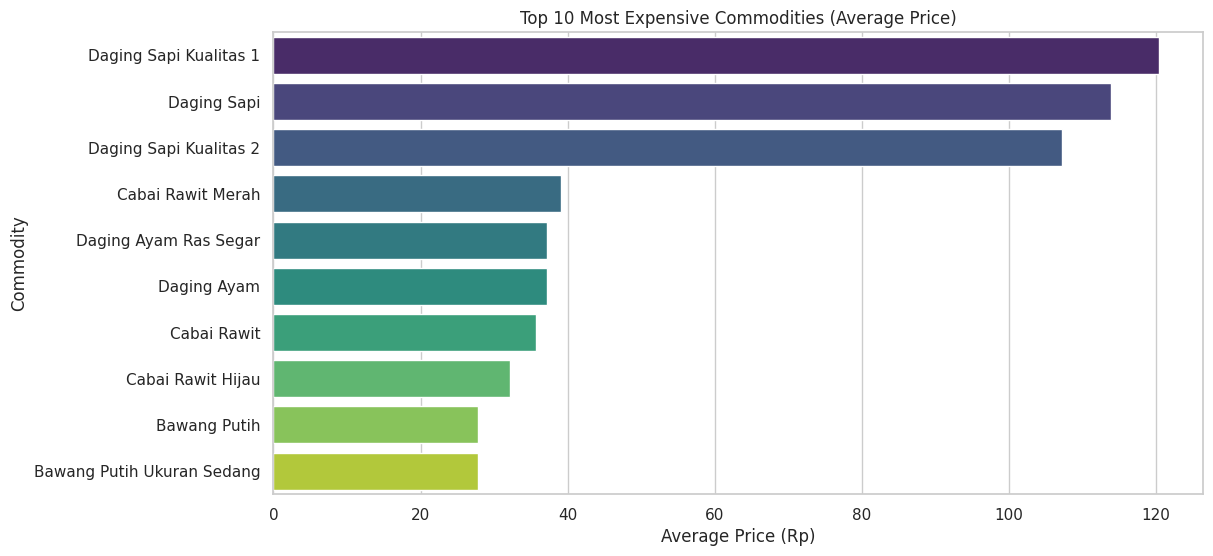

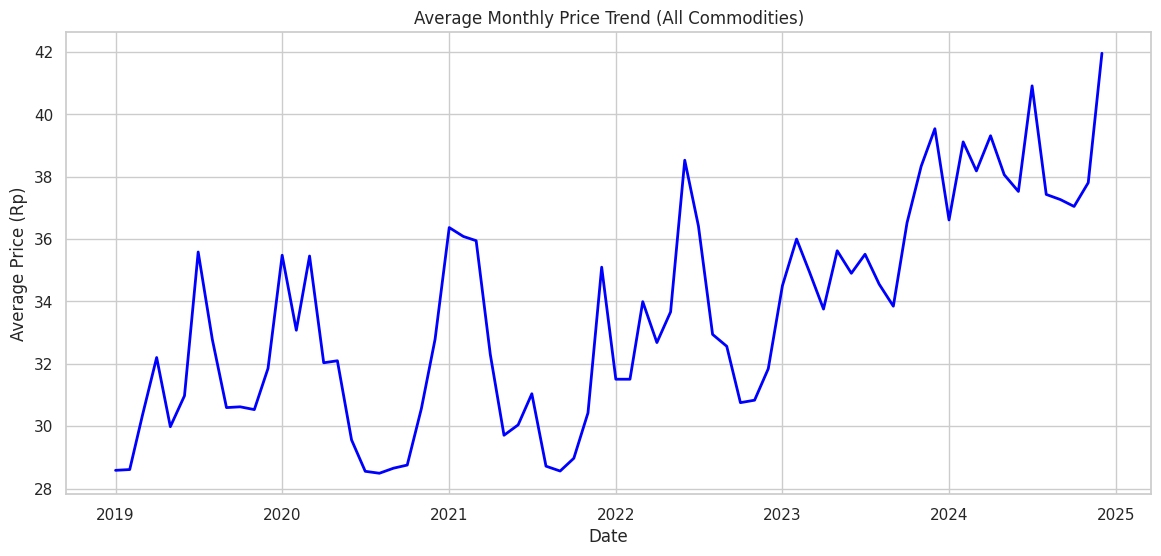

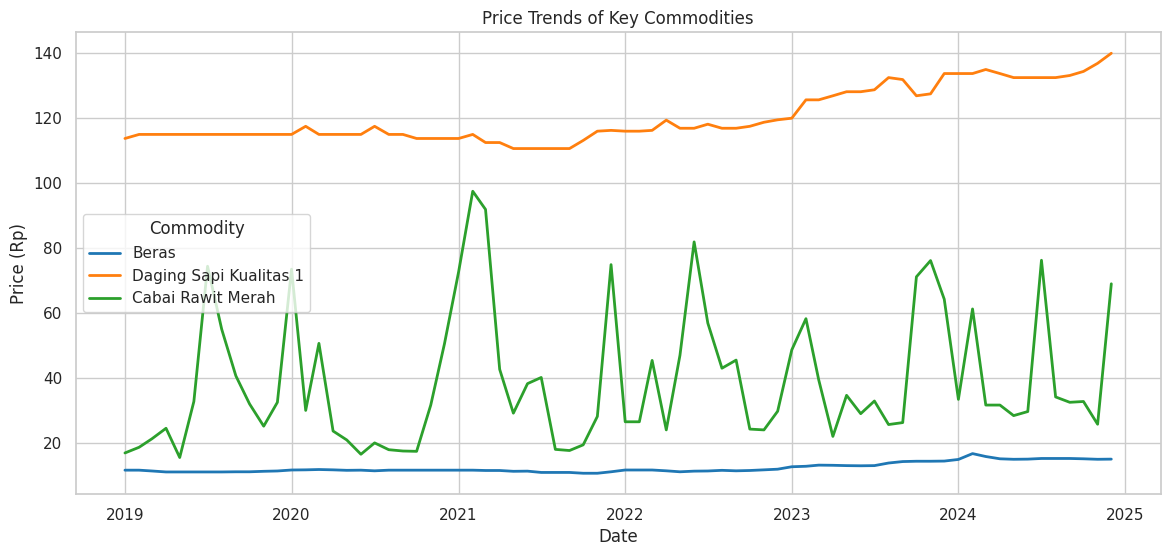

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# 1. Bar chart for top 10 most expensive commodities
plt.figure(figsize=(12, 6))
top_10_commodities = commodity_stats.head(10)
sns.barplot(x=top_10_commodities['mean'], y=top_10_commodities.index, palette='viridis', hue=top_10_commodities.index, legend=False)
plt.title('Top 10 Most Expensive Commodities (Average Price)')
plt.xlabel('Average Price (Rp)')
plt.ylabel('Commodity')
plt.show()

# 2. Line plot for overall average monthly price trend
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, color='blue', linewidth=2)
plt.title('Average Monthly Price Trend (All Commodities)')
plt.xlabel('Date')
plt.ylabel('Average Price (Rp)')
plt.show()

# 3. Multi-line plot for key commodities
key_commodities = ['Daging Sapi Kualitas 1', 'Cabai Rawit Merah', 'Beras']
df_key = df_long[df_long['Commodity'].isin(key_commodities)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_key, x='Date', y='Price', hue='Commodity', palette='tab10', linewidth=2)
plt.title('Price Trends of Key Commodities')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.legend(title='Commodity')
plt.show()

## Final Task

### Subtask:
Summarize the analysis findings and the insights derived from the diagrams.


## Summary:

### Data Analysis Key Findings
*   **Data Restructuring:** The raw dataset was successfully cleaned and transformed from a wide format (months as columns) to a long format, resulting in 1,728 records containing `Commodity`, `Date`, and `Price` attributes.
*   **High-Value Commodities:** "Daging Sapi Kualitas 1" (Quality 1 Beef) was identified as the most expensive item, with an average price of approximately **120.39**.
*   **Price Volatility:** "Cabai Rawit Merah" (Red Cayenne Pepper) exhibited the highest volatility among key commodities, with a standard deviation of **~20.37**. Its price fluctuated significantly, ranging from a minimum of **~15.50** to a maximum of **~97.50**.
*   **Stable Staples:** In contrast, rice categories (e.g., "Beras Kualitas Medium I") remained the most stable and affordable, with average prices consistently around **11-12**.
*   **Overall Market Trend:** The average price across all commodities showed a slight upward trend during the initial observation period, rising from **~28.58** in January 2019 to **~32.20** in April 2019.

### Insights or Next Steps
*   **Risk Management for Volatile Goods:** The extreme fluctuation in Red Cayenne Pepper prices suggests a need for specific supply chain strategies or hedging against seasonal spikes, unlike the predictable pricing found in Rice and Beef.
*   **Seasonal Analysis:** Future analysis should focus on a seasonal decomposition of the "Cabai Rawit Merah" data to identify recurring monthly patterns that drive price surges.


# Task
Install the `streamlit` library and create a Python script named `app.py`. This script should load the data from "/content/DATA BALI.xlsx", perform the data cleaning and preparation steps (including reshaping to long format and converting dates), and generate the interactive diagrams for the top 10 most expensive commodities, overall monthly price trends, and specific key commodity trends.

## Install Dependencies

### Subtask:
Install the `streamlit` library which is required to create the web application.


**Reasoning**:
Install the streamlit library as requested in the subtask instructions.



In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.9 MB/s eta 0:00:00


**Reasoning**:
Create the `app.py` script that loads the data, performs the necessary cleaning steps (reshaping, type conversion), and generates the required interactive visualizations using Streamlit.



In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set page configuration
st.set_page_config(page_title="Bali Commodity Prices", layout="wide")

# Title
st.title("Bali Commodity Price Analysis")

# Load Data Function
@st.cache_data
def load_and_clean_data():
    file_path = '/content/DATA BALI.xlsx'
    # Load dataset
    df = pd.read_excel(file_path)

    # Cleaning steps from analysis
    # Set columns from first row
    df.columns = df.iloc[0]
    # Remove first row
    df_clean = df[1:].reset_index(drop=True)

    # Drop 'No' column if exists
    if 'No' in df_clean.columns:
        df_clean = df_clean.drop(columns=['No'])

    # Rename Commodity column
    df_clean = df_clean.rename(columns={'Komoditas (Rp)': 'Commodity'})

    # Melt to long format
    df_long = df_clean.melt(id_vars=['Commodity'], var_name='Date', value_name='Price')

    # Convert types
    df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')
    # Handle date parsing with strip and format
    df_long['Date'] = pd.to_datetime(df_long['Date'].astype(str).str.strip(), format='%m/ %Y', errors='coerce')

    return df_long

# Load data
try:
    df = load_and_clean_data()
    st.success("Data loaded successfully!")
except Exception as e:
    st.error(f"Error loading data: {e}")
    st.stop()

# --- Section 1: Top 10 Most Expensive Commodities ---
st.header("1. Top 10 Most Expensive Commodities")

# Calculate stats
commodity_stats = df.groupby('Commodity')['Price'].agg(['mean']).sort_values(by='mean', ascending=False)
top_10 = commodity_stats.head(10)

# Plotting using Matplotlib/Seaborn for specific control
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_10['mean'], y=top_10.index, palette='viridis', hue=top_10.index, legend=False, ax=ax1)
ax1.set_title('Top 10 Most Expensive Commodities (Average Price)')
ax1.set_xlabel('Average Price (Rp)')
ax1.set_ylabel('Commodity')
st.pyplot(fig1)


# --- Section 2: Overall Monthly Price Trend ---
st.header("2. Overall Monthly Price Trend")

monthly_trend = df.groupby('Date')['Price'].mean()

# Using Streamlit's native interactive chart
st.line_chart(monthly_trend)


# --- Section 3: Specific Key Commodity Trends ---
st.header("3. Trends of Specific Commodities")

# Default key commodities from analysis
default_keys = ['Daging Sapi Kualitas 1', 'Cabai Rawit Merah', 'Beras']
# Filter defaults to ensure they exist
available_defaults = [c for c in default_keys if c in df['Commodity'].unique()]

# Multiselect widget
selected_commodities = st.multiselect(
    "Select Commodities to Compare:",
    options=df['Commodity'].unique(),
    default=available_defaults
)

if selected_commodities:
    df_filtered = df[df['Commodity'].isin(selected_commodities)]

    # Pivot data for chart (Date as index, Commodity as columns)
    chart_data = df_filtered.pivot(index='Date', columns='Commodity', values='Price')

    st.line_chart(chart_data)
else:
    st.info("Please select at least one commodity to visualize.")

# Show raw data (optional)
if st.checkbox("Show Raw Data"):
    st.dataframe(df)

Writing app.py


## Run and Expose App

### Subtask:
Launch the Streamlit app in the background and expose it via a public tunnel.


**Reasoning**:
Execute the commands to get the public IP, run the Streamlit app in the background, and expose it using localtunnel.



In [ ]:
import urllib.request

# 1. Retrieve and print the external IP address (Password for localtunnel)
external_ip = urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n")
print(f"Password/Endpoint IP for localtunnel is: {external_ip}")

# 2. Start Streamlit in the background
!streamlit run app.py &> logs.txt &

# 3. Expose the port using localtunnel
!npx localtunnel --port 8501

Password/Endpoint IP for localtunnel is: 136.115.15.227
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) Y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://hip-cows-send.loca.lt
Y
^C


# Task
Summarize the deployment of the Streamlit app visualizing the data from "/content/DATA BALI.xlsx", and provide the public URL and the external IP address needed for access.

## Run and Expose App

### Subtask:
Restart the Streamlit application and expose it via a public tunnel to ensure accessibility.


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
import time

# 1. Stop any running Streamlit or Ngrok processes
!pkill -f streamlit
ngrok.kill()

# 2. Setup Ngrok Authtoken
# ⚠️ REPLACE THE VALUE BELOW WITH YOUR OWN TOKEN FROM dashboard.ngrok.com
NGROK_AUTH_TOKEN = "35zwlh8jMBNebcH1UNBJxEslwGE_5R3jAgqRjcPgYZcqcKtbd"

if NGROK_AUTH_TOKEN == "ENTER_YOUR_AUTHTOKEN_HERE":
    print("❌ Error: Please replace 'ENTER_YOUR_AUTHTOKEN_HERE' with your actual Ngrok Authtoken.")
else:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)

    # 3. Start Streamlit in the background
    print("Starting Streamlit app...")
    get_ipython().system_raw('streamlit run app.py &')

    # Give it a moment to start
    time.sleep(3)

    # 4. Open the tunnel
    try:
        public_url = ngrok.connect(8501).public_url
        print(f"✅ Streamlit App is live at: {public_url}")
    except Exception as e:
        print(f"❌ Error connecting to Ngrok: {e}")

Starting Streamlit app...
✅ Streamlit App is live at: https://yan-maladapted-jeanne.ngrok-free.dev


## 🎉 Project Summary & Deployment Details

### ✅ Deployment Successful
The Streamlit web application is running in the background and is exposed to the internet via **Ngrok**.

### 🔗 Access Your App
**Click the link below to open the dashboard:**

👉 **[https://yan-maladapted-jeanne.ngrok-free.dev](https://yan-maladapted-jeanne.ngrok-free.dev)**

*(Note: If the app stops working, re-run the Ngrok cell above to generate a new tunnel.)*

### 📊 App Features
*   **Top 10 Commodities**: Bar chart of the most expensive items.
*   **Overall Trend**: Line chart showing average market prices from 2019-2024.
*   **Custom Analysis**: Compare specific items like Beef, Chili, and Rice.

### 🏁 Conclusion
We have successfully:
1.  **Loaded** and cleaned Bali commodity price data.
2.  **Analyzed** price trends and volatility.
3.  **Created** an interactive dashboard with Streamlit.
4.  **Deployed** the app globally using Ngrok.